In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from sklearn.decomposition import PCA
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
plt.rcParams['figure.figsize'] = (8.0, 8.0)

import numpy as np
import os
import pandas as pd
import re
from tqdm import tqdm_notebook
from random import shuffle

In [4]:
# df = pd.read_csv('../dataset/vine-labelled-data/vine_labeled_cyberbullying_data.csv')
# df.head()

In [5]:
# module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/3" #@param ["https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]

In [6]:
# def generate_comment_embed(comments):
#     # Import the Universal Sentence Encoder's TF Hub module
#     embed = hub.Module(module_url)
#     print('Model Loaded')
#     batchsize = 64

#     # Reduce logging output.
#     tf.logging.set_verbosity(tf.logging.ERROR)
#     comment_embeddings = []

#     with tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)) as session:
#         session.run([tf.global_variables_initializer(), tf.tables_initializer()])
#         print('Graph Initialized')
#         for i in tqdm_notebook(range(0, len(comments), batchsize)):
#             #print(len(comments[i:i+batchsize]))
#             comment_embeddings += np.array(session.run(embed(comments[i:i+batchsize]))).tolist()

#     return comment_embeddings

In [12]:
# comments = []
# for i in tqdm_notebook(range(len(df))):
#     for j in range(1, 100):
#         comm = df['column{}'.format(j)][i]
#         #print(comm, i, j)
#         try:
#             comm = [x.strip() for x in re.findall('\:\:.*?(.*)\(created', comm, re.MULTILINE | re.DOTALL)]
#             #break
#             if comm == []:
#                 break
#             else:
#                 comments += comm
#         except TypeError:
#             pass

# shuffle(comments)

In [8]:
convert_str_to_array# len(comments)

In [9]:
# comment_embedding = generate_comment_embed(comments)

In [45]:
def get_embedding(comment):
    comment = [x.strip() for x in re.findall('\:\:.*?(.*)\(created', comment, re.MULTILINE | re.DOTALL)]
    if comment != []:
        comment = comment[0]
        chunksize = 10**4
        for chunk in pd.read_csv('comment_embedding.csv', chunksize=chunksize):
            try:
                if not (chunk[chunk.comment == comment].empty):
                    embed = chunk[chunk.comment == comment].embedding
                    X = []
                    for emb in embed:
                        emb = emb.replace('[', '')
                        emb = emb.replace(']', '')
                        emb = emb.replace(' ', '')
                        e = np.array([float(x) for x in emb.split(',')])
                        X.append(e)
                    return X
            except Exception as e:
                print(e)

In [46]:
def post_embedding(df, index):
    embedding = []
    for i in range(1, 100):
        embed = get_embedding(df['column{}'.format(i)][index])
        embedding.append(embed)
    
    return np.average(embedding)

In [47]:
df = pd.read_csv('../../Vine-Dataset/vine-labelled-data/vine_labeled_cyberbullying_data.csv')

In [48]:
post_embed = []
for i in tqdm_notebook(range(len(df))):
    post_embed.append(post_embedding(df, i))

TypeError: can only concatenate list (not "NoneType") to list

In [3]:
chunksize = 10**6
embedding_PCA = []
comments = []
pca = PCA(n_components=2)

for chunk in tqdm_notebook(pd.read_csv('comment_embedding.csv', chunksize=chunksize)):
    comments += list(chunk.comment)
    embed = chunk.embedding
    X = []
    for emb in embed:
        emb = emb.replace('[', '')
        emb = emb.replace(']', '')
        emb = emb.replace(' ', '')
        e = np.array([float(x) for x in emb.split(',')])
        X.append(e)
        #break
    #print(len(X))
    #print(X)
    result = pca.fit_transform(X)
    embedding_PCA += list(result)
    
chunk.head()

,Unnamed: 0,comment,embedding
0,0,NaN,"[0.05665219947695732, -0.01405731774866581, -0..."
1,1,At least do the Terio right Yaris_Sanchez,"[-0.007041027769446373, 0.000817408028524369, ..."
2,2,Write this on 4 other vines or your mom will d...,"[0.027670742943882942, -0.05315176770091057, -..."
3,3,Why don't guys from BHS look like this 😭 he is...,"[-0.08497410267591476, 0.017966417595744133, -..."
4,4,😱😭,"[-0.006917111575603485, 0.0002379393990850076,..."


In [4]:
embedding_PCA = np.array(embedding_PCA)

<IPython.core.display.Javascript object>


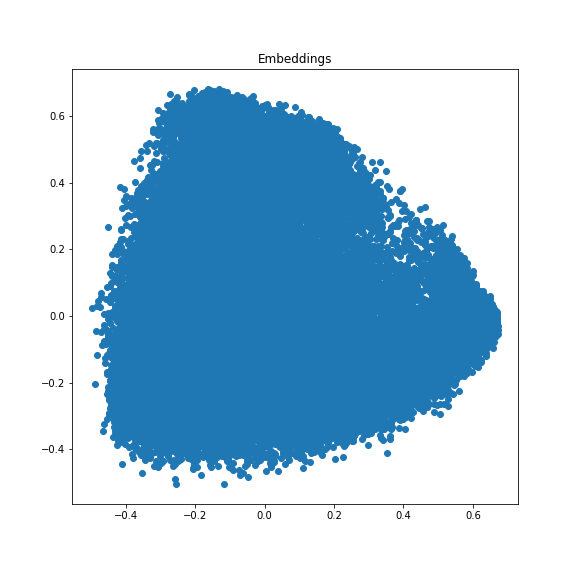

In [23]:
fig, ax = plt.subplots()
ax.plot(embedding_PCA[:, 0], embedding_PCA[:, 1], 'o')
ax.set_title('Embeddings')
plt.show()

In [6]:
bully_comments = []
nonbully_comments = []
df = pd.read_csv('../../dataset/vine-labelled-data/vine_labeled_cyberbullying_data.csv')

In [7]:
bully_df = df[df.question2 == 'bullying'].reset_index(drop=True)
nonbully_df = df[df.question2 == 'noneBll'].reset_index(drop=True)

In [8]:
bully_comments = []
for i in tqdm_notebook(range(len(bully_df))):
    for j in range(1, 100):
        comm = bully_df['column{}'.format(j)][i]
        #print(comm, i, j)
        try:
            comm = [x.strip() for x in re.findall('\:\:.*?(.*)\(created', comm, re.MULTILINE | re.DOTALL)]
            #break
            if comm == []:
                break
            else:
                bully_comments += comm
        except TypeError:
            pass

In [9]:
nonbully_comments = []
for i in tqdm_notebook(range(len(nonbully_df))):
    for j in range(1, 100):
        comm = nonbully_df['column{}'.format(j)][i]
        #print(comm, i, j)
        try:
            comm = [x.strip() for x in re.findall('\:\:.*?(.*)\(created', comm, re.MULTILINE | re.DOTALL)]
            #break
            if comm == []:
                break
            else:
                nonbully_comments += comm
        except TypeError:
            pass

In [10]:
bully_emb = []
for comm in tqdm_notebook(bully_comments):
    index = comments.index(comm)
    bully_emb.append(list(embedding_PCA[index]))
    #print(embedding_PCA[index])

bully_emb = np.array(bully_emb)

In [17]:
nonbully_emb = []
for comm in tqdm_notebook(nonbully_comments):
    try:
        index = comments.index(comm)
        nonbully_emb.append(list(embedding_PCA[index]))
        #print(embedding_PCA[index])
    except ValueError:
        pass

nonbully_emb = np.array(nonbully_emb)

<IPython.core.display.Javascript object>


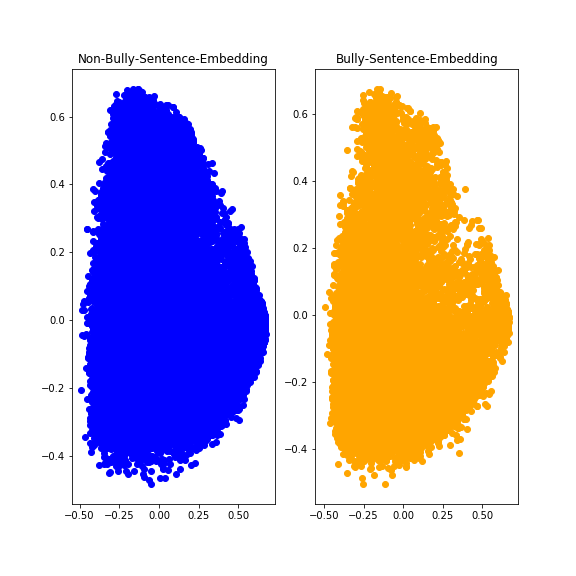

In [20]:
fig, ax = plt.subplots(1, 2)
ax[0].set_title('Non-Bully-Sentence-Embedding')
ax[0].plot(nonbully_emb[:, 0], nonbully_emb[:, 1], 'o', color='blue')

ax[1].set_title('Bully-Sentence-Embedding')
ax[1].plot(bully_emb[:, 0], bully_emb[:, 1], 'o', color='orange')
plt.show()

<IPython.core.display.Javascript object>


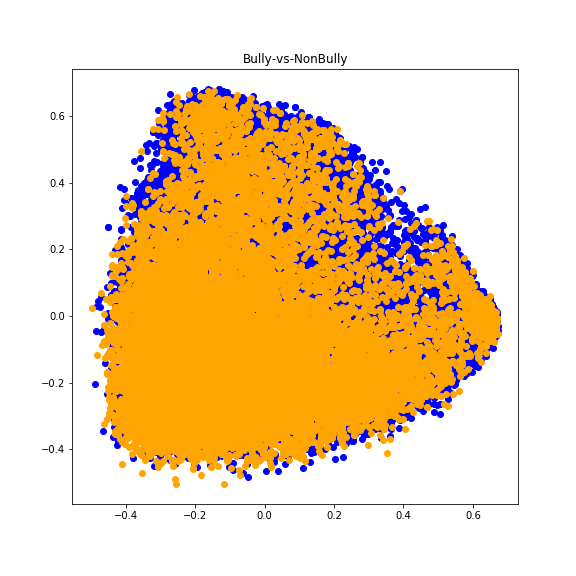

In [22]:
fig, ax = plt.subplots()
ax.set_title('Bully-vs-NonBully')
ax.plot(nonbully_emb[:, 0], nonbully_emb[:, 1], 'o', color='blue')
ax.plot(bully_emb[:, 0], bully_emb[:, 1], 'o', color='orange')
plt.show()

In [ ]:
emb_df = pd.read_csv('comment_embedding.csv', chunksize=chunksize)

bully_post_embedding = []
for i in range(len(df)):
    comments_emd = []
    for j in range(1, 100):
        comm = df['column{}'.format(j)][i]

        try:
            comm = [x.strip() for x in re.findall('\:\:.*?(.*)\(created', comm, re.MULTILINE | re.DOTALL)]
            if comm == []:
                break
            else:
                ndex = comments.index(comm)
                bully_emb.append()
                comments += comm
        except TypeError:
            pass